In [265]:
# Import the pathlib and csv library
from pathlib import Path
import pandas as pd
import panel as pn
import pygal
import csv
import seaborn as sns
import hvplot.pandas
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
pn.extension()

# Set the file paths

crypto_path = Path("Data/crypto_user_growth_aus.csv")
gym_est_path = Path("Data/gym_establishments.csv")
gym_user_path = Path("Data/gym_users.csv")
total_ops_path = Path("Data/total_operational_savings_edited.csv")
smart_path = Path("Data/smartphone_users.csv")
coin_path = Path("Data/coin_bitcoin.csv")
crypto_user_path = Path("Data/crypto_user_growth_aus.csv")
wallet_user_path = Path ("Data/my-wallet-n-users.csv")

In [214]:
# Reading in the crypto user growth
## Display Crypto user dataframe

crypto_df = pd.read_csv(crypto_path, index_col="year")

In [213]:
# Reading in the gym establishments
## Display gym establishments dataframe

gym_est_df = pd.read_csv(gym_est_path, index_col="year")

In [212]:
# Reading in the gym user
## Display gym user dataframe

gym_user_df = pd.read_csv(gym_user_path, index_col = "age")
gym_user_df = gym_user_df.drop("No", axis=1)

In [215]:
# Reading in the total operational savings
## Display total operational savings dataframe

total_ops_df = pd.read_csv(total_ops_path)

In [145]:
# Data cleansing of total_ops_df
## Step 1 = renaming columns, 
### New cleansed dataframe called total_ops

total_ops = total_ops_df.set_axis(["Company","Transactional Occurence","Company Transaction Amnt",
                                  "Total Cost via Company","Hedera Transaction Amnt","Total Cost via Hedera","Savings Hedera vs Company"], axis=1, inplace=False)
total_ops.head()

,Company,Transactional Occurence,Company Transaction Amnt,Total Cost via Company,Hedera Transaction Amnt,Total Cost via Hedera,Savings Hedera vs Company
0,debitsuccess,100,$1.74,$174,0.00014,0.014,$173.986
1,debitsuccess,1000,$1.74,$$1740,0.00014,0.140,$1739.86
2,debitsuccess,10000,$1.74,$$17400,0.00014,1.140,$17398.6
3,debitsuccess,100000,$1.74,$$174000,0.00014,11.400,$173986
4,payadvantage,100,0.88,88,0.00014,0.014,87.986


In [146]:
# Checking datatypes within total_ops dataframe
total_ops.dtypes

Company                       object
Transactional Occurence        int64
Company Transaction Amnt      object
Total Cost via Company        object
Hedera Transaction Amnt      float64
Total Cost via Hedera        float64
Savings Hedera vs Company     object
dtype: object

In [374]:
# Data cleansing of total_ops
## Step 2 renaming indexes i.e. 1 = Payadvantage, 2 = PaySmart etc
### Then indexed Company column
#### New cleansed dataframe called total_ops_2

total_ops_2 = total_ops.replace({1:"PayAdvantage",2:"PaySmart",3:"EzyPay"})
total_ops_2 = total_ops_2.set_index("Company")

In [148]:
# Looking at total_ops_2 statistics

total_ops_2.describe()

,Transactional Occurence,Hedera Transaction Amnt,Total Cost via Hedera
count,16.000000,1.600000e+01,16.000000
mean,27775.000000,1.400000e-04,3.206000
std,43251.843891,2.799398e-20,4.912456
min,100.000000,1.400000e-04,0.014000
25%,775.000000,1.400000e-04,0.108500
50%,5500.000000,1.400000e-04,0.640000
75%,32500.000000,1.400000e-04,3.900000
max,100000.000000,1.400000e-04,11.400000


In [362]:
# Reading in the total smartphone users
## Display smartphone users dataframe

smart_df = pd.read_csv(smart_path, index_col="year")
smart_df = smart_df.drop("Unnamed: 2", axis=1)

In [364]:
# Combine smartphone user data with crypto data to find correlation
crypto_smart_phone = pd.concat([crypto_df, smart_df], axis=1).dropna()

# Create correlation plot for smartphone and crypto data

correlation_smartphone_crypto = crypto_smart_phone.pct_change()

# Calculate Correlation
correlation = correlation_smartphone_crypto.corr()

Matplotlib(Figure)
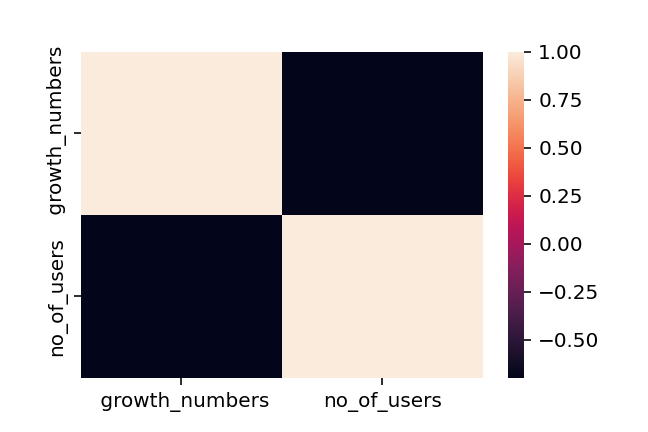

In [370]:
## Createa a pn.pane using Matplotlib to add to dashboard

fig = plt.Figure(figsize=(4.5, 3))
ax = fig.add_subplot(111)
sns.heatmap(correlation, ax=ax)
pn.pane.Matplotlib(fig)

In [337]:
# Create_bar_chart function to plot (bar) dataframes

def create_bar_chart(data, title,xlabel,ylabel,color):

    create_bar_chart = data.hvplot.bar(title=title, xlabel=xlabel, ylabel=ylabel, color=color, height=500)
    
    return(create_bar_chart)

In [196]:
# Bar chart for crypto dataframe

crypto_bar_chart = create_bar_chart(crypto_df,"Cryptocurrency User Growth (in Years)", "Year", "In Millions ($)", "Orange").opts(yformatter="%.0f")

In [198]:
# Bar chart for gym establishments dataframe

gym_est_chart = create_bar_chart(gym_est_df,"Number of Gym Establishments (in Years)","Year","Number of gyms","Royalblue")

In [179]:
# Pygal Chart for gym establishments dataframe

gym_est_chart_pygal = pygal.Bar()
gym_est_chart_pygal.add('Gyms Open', [3900, 4400,4800,5000,5300])
gym_est_chart_pygal.x_labels = (2016,2017,2018,2019,2020)
gym_est_chart_pygal.render_to_file('gym_est_chart_pygal.svg')

In [199]:
# Bar chart for gym users dataframe

gym_user_chart = create_bar_chart(gym_user_df,"Number of Gym Users (2021)","Age Group","Number of people","green").opts(yformatter="%.0f")

In [181]:
# Bar chart smartphone users

def smart_user_plot(
    
smart_users_chart =  create_bar_chart(smart_df,"Number of people using smartphones","Years","Number of people","hotpink").opts(yformatter="%.0f")
    
):
    return smart_users_chart

In [224]:
# Creating transactional savings dataframe comparison for 100 transactional occurence
## Data source = total_ops_2
### New dataframe called total_ops_100

total_ops_100 = total_ops_2.loc[total_ops_2["Transactional Occurence"] == 100]
total_ops_100 = total_ops_100[["Savings Hedera vs Company"]]

In [185]:
# Creating plot

# total_ops_100.plot(kind="bar",title="Company Comparison",colormap="Accent",figsize=(20,10))

In [222]:
# Creating transactional savings dataframe comparison for 1000 transactional occurence
## Data source = total_ops_2
### New dataframe called total_ops_1000

total_ops_1000 = total_ops_2.loc[total_ops_2["Transactional Occurence"] == 1000]

In [223]:
# Creating transactional savings dataframe comparison for 1000 transactional occurence
## Data source = total_ops_2
### New dataframe called total_ops_10000

total_ops_10000 = total_ops_2.loc[total_ops_2["Transactional Occurence"] == 10000]

In [218]:
# Creating transactional savings dataframe comparison for 1000 transactional occurence
## Data source = total_ops_2
### New dataframe called total_ops_100000

total_ops_100000 = total_ops_2.loc[total_ops_2["Transactional Occurence"] == 100000]

In [360]:
## Create pn.Row, pn.Column and pn.pane.SVG functions for the Dashboard Presentation

# .PNG and .SVG
pygal_svg = pn.pane.SVG('gym_est_chart_pygal.svg', width=800, height=600)
gympay_pane = pn.pane.PNG('Gympay.png', width=600)


#pn.Rows

smartphone_users = pn.Row(smart_user_plot,crypto_bar_chart)

In [361]:
## pn.pane.PNG Function code
# pygal_png = pn.pane.PNG('gym_est_chart_pygal.png', width=800, height=600)

In [380]:
# Create columns and or rows for Dashboard

column = pn.Column(
    ('# Welcome to GymPay.'),
    gympay_pane,
    ('On this project we decided to gather research on blockchain technology and its market potential to change the financial payment services industry, with example given for the Fitness Industry.'),
    ('This Dashboard includes a range of plots to show you the business potential of a blockchain geared product in the Fitness world.'),
    ('Click the Tabs above to shift through each plot and analysis.'),
)

column_pygal_gyms = pn.Column(
    ('# Gym Establishments Over Time In Australia'),
    ('Python Library Used: Pygal'),
    pygal_svg,
)

column_smartphone_users = pn.Column(
    ('# Smartphone Users Growth Projected'),
    ('Python Libray Used: Hvplot'),
    smartphone_users,
    fig
)

In [381]:
# Create Dashboard Tabs
dashboard = tabs = pn.Tabs(
        ## hello
    ("Welcome", column),
    ('Gym Estabhlishment Growth', column_pygal_gyms),
    ('Smartphone User Projection', column_smartphone_users)
)

Tabs
    [0] Column
        [0] Markdown(str)
        [1] PNG(str, width=600)
        [2] Markdown(str)
        [3] Markdown(str)
        [4] Markdown(str)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] SVG(str, height=600, sizing_mode='fixed', width=800)
    [2] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Row
            [0] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(Bars, name='interactive07806')
            [1] HoloViews(Bars)
        [3] Matplotlib(Figure)
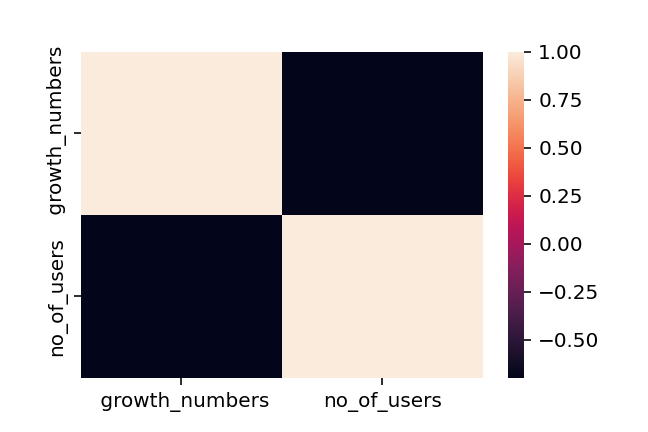
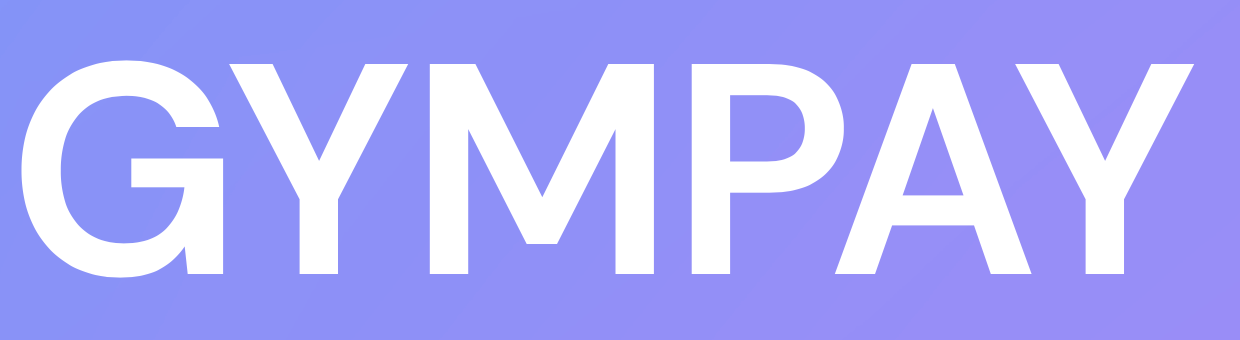

In [382]:
dashboard.servable()